# Recap


Raw sequencing data: `.fastq` format 

Removing adapters: `TRIMMOMATIC`

Mapping: `bwa` sequencing data to `.bam`  format 

`samtools` program

`samtools view` - look at (binary) file

`samtools sort` - nicely sort reads along the chromosomes

`samtools index` - create an index file

`samtools stats` - create statistics for `.bam` file

Now, what we can do is:

* operating on the command line
* inspecting & QC'ing raw sequencing data
* mapping the data to a reference genome and QC'ing


# Genotypes!

That is so far a nice progress! Now, what we want to know is differences between the reference genome and the sequencing data we have generated/obtained. That is, calling the genotypes: Getting a list of positions in the genome and which allele an individual carries. This is the information you actually want to know from genomic data.

These files contain different types of information:

* Header
* Position
* Alleles
* Info
* Genotypes

Note the transition from individual reads in a bam file to coordinates in the reference genome.

### VCF files

The variant call format (VCF) is a standard format of a text file to store genetic variants and their metadata. An example of a VCF file is shown below.

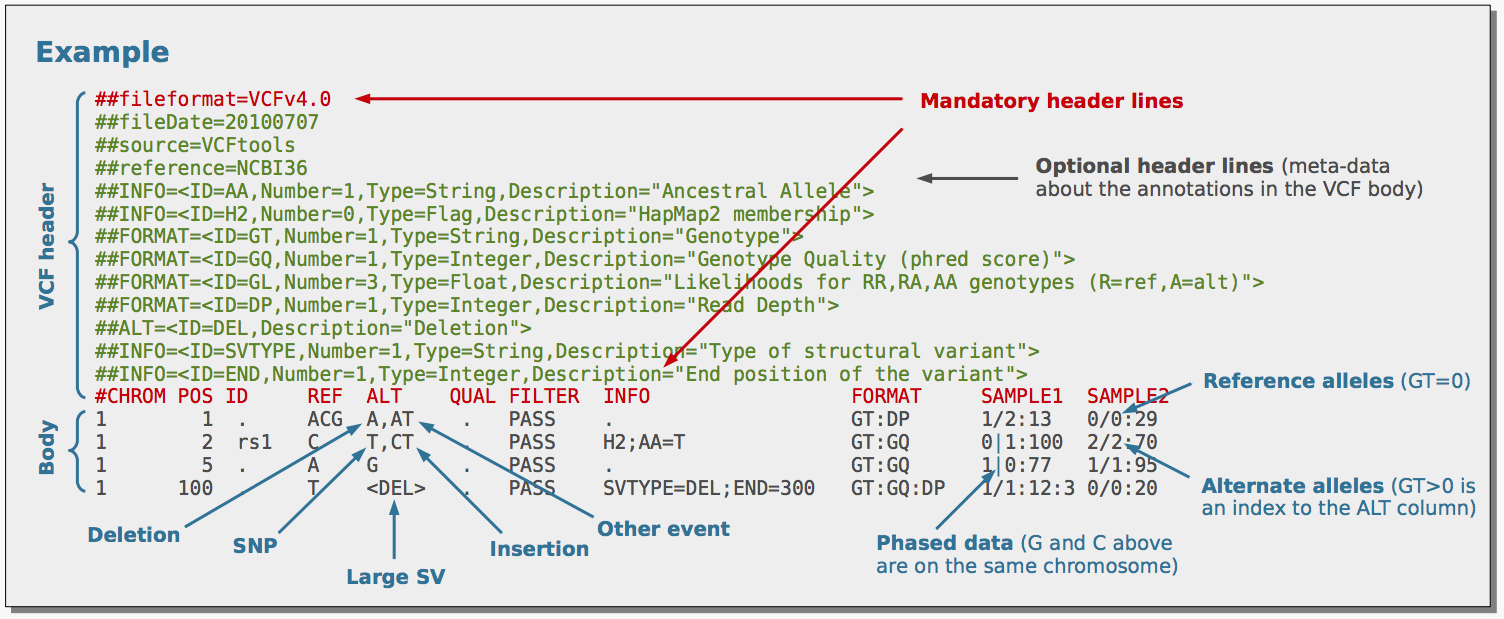

Lines starting with the character `#` are header lines. These header lines define different metadata. Lines starting without `#` store genetic variants. Each line represents a variant. This figure is from https://davetang.github.io/learning_vcf_file/#introduction.

More information about VCF files can be found in [hts-specs](https://samtools.github.io/hts-specs/).


## GATK

[Genome Analysis ToolKit](https://gatk.broadinstitute.org/hc/en-us): This is the most common tool to get genotypes from sequencing data. It can do many more things (*toolkit*), but one of the most important core uses is really getting the genotypes.

We can run GATK to call the genotypes:

```
gatk --java-options "-Xmx1g" HaplotypeCaller -L chr21 -R /home/local/ANTHROPOLOGY/kuhlwilmm83/refgen/hg19/hg19.p13.plusMT.no_alt_analysis_set.fa.gz  -I test.merged.bam -ERC BP_RESOLUTION -O test.vcf.gz
```

You need to specify the input (`-I`), the output (`-O`) and of course the reference genome to compare to (`-R`). There are many more options (and their details might depend on the version of GATK you are using), you can find the documentation on the website, or by `gatk HaplotypeCaller --help`.

Let's inspect the output!

In our case, we restrict the analysis to chromosome 21 (`-L chr21`), as this is the smallest chromosome and a rather quick and easy procedure in a small sequencing dataset like this. Obviously, it will take much longer for whole genomes with several-fold coverage. However, the process of obtaining the genotypes by itself from "standard" sequencing data is not complex, as the tool is well-maintained in that regard. What would be "non-standard" situations?

Now, we change a parameter, and let's compare the files!

```
gatk --java-options "-Xmx1g" HaplotypeCaller -L chr21 -R /home/local/ANTHROPOLOGY/kuhlwilmm83/refgen/hg19/hg19.p13.plusMT.no_alt_analysis_set.fa.gz  -I test.merged.bam -ERC NONE -O testb.vcf.gz
```


## Something you may do with the VCF file

* How many SNPs are in the VCF files?


* What is the position of the first and the last SNP?


* What is the difference between the two vcf files you created from the same bam file?


## Data analysis of VCF files

VCF files may contain a lot of information! Since they are text files, you may actually filter them with command line tools such as `awk`.

For example, let's try `zgrep "0/1" test.vcf.gz` or `zcat test.vcf.gz | awk '$4=="A" && $5~"G"'`.

As you can see, these simple tools may help you to get basic information about the content of the file, it's not just applicable to apples and oranges... It can serve as a quick check, *e.g.* if you have many more heterozygous positions than expected.


* Why could that be the case?


Obviously, with such a complex data format, there are many more things you may want to do, and more specialized tools are necessary. One of the most common ones is `bcftools`.

## BCFTOOLS

`bcftools` is an efficient software for manipulating and analysing VCF files. As is the case for most programs, there are many possible commands in `bcftools`. More information about `bcftools` can be found in its [manual](https://samtools.github.io/bcftools/bcftools.html).

To find out available commands, you can type the following command in the terminal:

```
bcftools
```

You don't even need to specify `--help` as the program tries to be helpful by default. That is very much appreciated, and often not the case...

It is a great program that can do many things. But you really need to know what things you can and may do, what exactly it is doing, and what each flag/parameter is doing. Otherwise, it's quite easy to screw things up here.



bcftools view + bgzip
different filter -m -M
bcftools annotate
bcftools concat
bcftools stat
